In [2]:
# import required packages

%matplotlib inline
from pathlib import Path
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pylab as plt

## 4.1
### a

In [3]:
cereals_df = pd.read_csv("Cereals.csv")

In [8]:
cereals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     76 non-null     float64
 9   sugars    76 non-null     float64
 10  potass    75 non-null     float64
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(7), int64(6), object(3)
memory usage: 9.8+ KB


In [17]:
cereals_df

name mfr type  calories  protein  fat  sodium  fiber  \
0                   100%_Bran   N    C        70        4    1     130   10.0   
1           100%_Natural_Bran   Q    C       120        3    5      15    2.0   
2                    All-Bran   K    C        70        4    1     260    9.0   
3   All-Bran_with_Extra_Fiber   K    C        50        4    0     140   14.0   
4              Almond_Delight   R    C       110        2    2     200    1.0   
..                        ...  ..  ...       ...      ...  ...     ...    ...   
72                    Triples   G    C       110        2    1     250    0.0   
73                       Trix   G    C       110        1    1     140    0.0   
74                 Wheat_Chex   R    C       100        3    1     230    3.0   
75                   Wheaties   G    C       100        3    1     200    3.0   
76        Wheaties_Honey_Gold   G    C       110        2    1     200    1.0   

    carbo  sugars  potass  vitamins  shelf  weight  cups     rating  
0     5.0     6.0   280.0        25      3     1.0  0.33  68.402973  
1     8.0     8.0   135.0         0      3     1.0  1.00  33.983679  
2     7.0     5.0   320.0        25      3     1.0  0.33  59.425505  
3     8.0     0.0   330.0        25      3     1.0  0.50  93.704912  
4    14.0     8.0     NaN        25      3     1.0  0.75  34.384843  
..    ...     ...     ...       ...    ...     ...   ...        ...  
72   21.0     3.0    60.0        25      3     1.0  0.75  39.106174  
73   13.0    12.0    25.0        25      2     1.0  1.00  27.753301  
74   17.0     3.0   115.0        25      1     1.0  0.67  49.787445  
75   17.0     3.0   110.0        25      1     1.0  1.00  51.592193  
76   16.0     8.0    60.0        25      1     1.0  0.75  36.187559  

[77 rows x 16 columns]

양적/수치적 변수 : calories, protein, fat, sodium, fiber, carbo, sugars, potass, weight, cups, rating  
순서형 변수 : vitamins, shelf  
명목형 변수 : mfr, type  

* shelf가 뭔 변수인지 모르겠음

**수치적 변수를 숫자로만 되어있는 변수로만 생각한다면**  
양적/수치적 변수 : name, mfr, type 제외한 모든변수  
명목형 변수 : mfr,type,name

### b

In [4]:
c1 = cereals_df[['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 
           'potass', 'weight', 'cups', 'rating','vitamins', 'shelf' ]]

pd.DataFrame({'mean' : c1.mean(), 'median' : c1.median(), 'min' : c1.min(), 'max' : c1.max(), 'std' : c1.std()})

mean      median        min         max        std
calories  106.883117  110.000000  50.000000  160.000000  19.484119
protein     2.545455    3.000000   1.000000    6.000000   1.094790
fat         1.012987    1.000000   0.000000    5.000000   1.006473
sodium    159.675325  180.000000   0.000000  320.000000  83.832295
fiber       2.151948    2.000000   0.000000   14.000000   2.383364
carbo      14.802632   14.500000   5.000000   23.000000   3.907326
sugars      7.026316    7.000000   0.000000   15.000000   4.378656
potass     98.666667   90.000000  15.000000  330.000000  70.410636
weight      1.029610    1.000000   0.500000    1.500000   0.150477
cups        0.821039    0.750000   0.250000    1.500000   0.232716
rating     42.665705   40.400208  18.042851   93.704912  14.047289
vitamins   28.246753   25.000000   0.000000  100.000000  22.342523
shelf       2.207792    2.000000   1.000000    3.000000   0.832524

### C

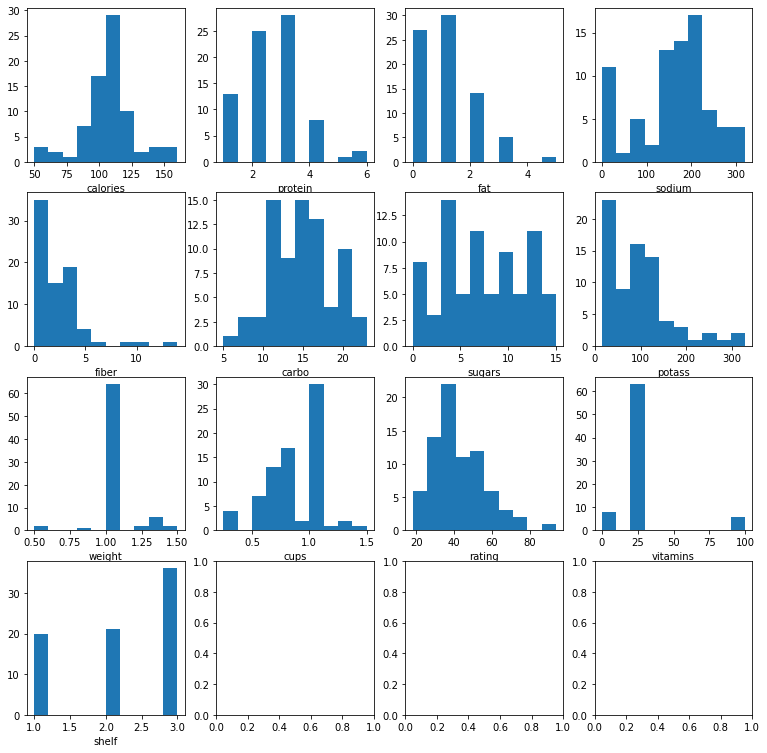

In [10]:
c1_name = [['calories','protein','fat','sodium'],['fiber','carbo','sugars','potass'],
          ['weight','cups','rating','vitamins'],['shelf']]
fig, ax = plt.subplots(nrows = 4,ncols = 4)

for i in range(4): #행
    for j in range(4): #열
        if i==3 and j>=1 :
            break
        ax[i][j].hist(cereals_df[c1_name[i][j]])
        ax[i][j].set_xlabel(c1_name[i][j])

fig.set_size_inches(13,13)
plt.show()

i. sugars  
ii. fat, fiber, potass, rating  
iii. potass의 최댓값 

In [13]:
cereals_1 = pd.DataFrame({'C_type' : cereals_df[cereals_df['type']=='C'].calories,
                          'H_type' : cereals_df[cereals_df['type']=='H'].calories})
cereals_1

C_type  H_type
0     70.0     NaN
1    120.0     NaN
2     70.0     NaN
3     50.0     NaN
4    110.0     NaN
..     ...     ...
72   110.0     NaN
73   110.0     NaN
74   100.0     NaN
75   100.0     NaN
76   110.0     NaN

[77 rows x 2 columns]

### d

<AxesSubplot:>

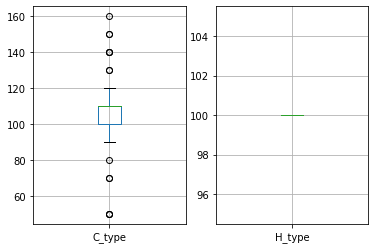

In [30]:
fig, axes = plt.subplots(nrows = 1,ncols = 2)

cereals_1.boxplot('C_type', ax=axes[0])
cereals_1.boxplot('H_type', ax=axes[1])

H type의 데이터 개수가 매우 적어서, 유의미한 분석을 할 수 없다고 고려된다.

### e

<AxesSubplot:title={'center':'rating'}, xlabel='shelf'>

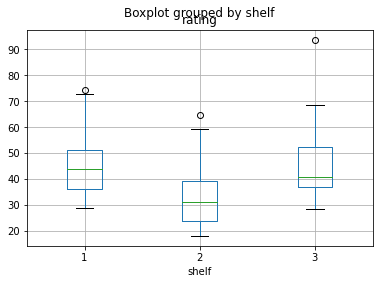

In [33]:
# 진열대 높이(shelf)에 따라 소비자 평점 boxplot 그리기 


fig, ax1 = plt.subplots()

cereals_df.boxplot(column = 'rating', by='shelf', ax=ax1)

소비자 평점을 선반의 높이로 예측할 수 있다면, 1번과 3번 범주를 합쳐서 하나의 범주로 바꾸어 예측하는 것이 생성할 가변수의 개수를 줄여 더 효율적이다.

### f

In [38]:
# 상관계수 표 (Corr()) / 산점도 행렬 (Table 3.4, seaborn library)

c1.corr()

calories   protein       fat    sodium     fiber     carbo  \
calories  1.000000  0.019066  0.498610  0.300649 -0.293413  0.257638   
protein   0.019066  1.000000  0.208431 -0.054674  0.500330 -0.025012   
fat       0.498610  0.208431  1.000000 -0.005407  0.016719 -0.300003   
sodium    0.300649 -0.054674 -0.005407  1.000000 -0.070675  0.297687   
fiber    -0.293413  0.500330  0.016719 -0.070675  1.000000 -0.380357   
carbo     0.257638 -0.025012 -0.300003  0.297687 -0.380357  1.000000   
sugars    0.566533 -0.291853  0.302497  0.058866 -0.138760 -0.471184   
potass   -0.072063  0.563706  0.200445 -0.042632  0.911528 -0.365003   
weight    0.696091  0.216158  0.214625  0.308576  0.247226  0.138467   
cups      0.087200 -0.244469 -0.175892  0.119665 -0.513061  0.367460   
rating   -0.689376  0.470618 -0.409284 -0.401295  0.584160  0.088712   

            sugars    potass    weight      cups    rating  
calories  0.566533 -0.072063  0.696091  0.087200 -0.689376  
protein  -0.291853  0.563706  0.216158 -0.244469  0.470618  
fat       0.302497  0.200445  0.214625 -0.175892 -0.409284  
sodium    0.058866 -0.042632  0.308576  0.119665 -0.401295  
fiber    -0.138760  0.911528  0.247226 -0.513061  0.584160  
carbo    -0.471184 -0.365003  0.138467  0.367460  0.088712  
sugars    1.000000  0.001414  0.455844 -0.048961 -0.763902  
potass    0.001414  1.000000  0.419933 -0.501607  0.416009  
weight    0.455844  0.419933  1.000000 -0.199583 -0.298124  
cups     -0.048961 -0.501607 -0.199583  1.000000 -0.203160  
rating   -0.763902  0.416009 -0.298124 -0.203160  1.000000

<AxesSubplot:>

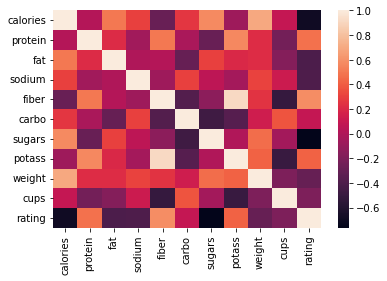

In [40]:
# 이건 걍 내가 보려고 추가적으로 그린거..
import seaborn as sns

corr = c1.corr()
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns)

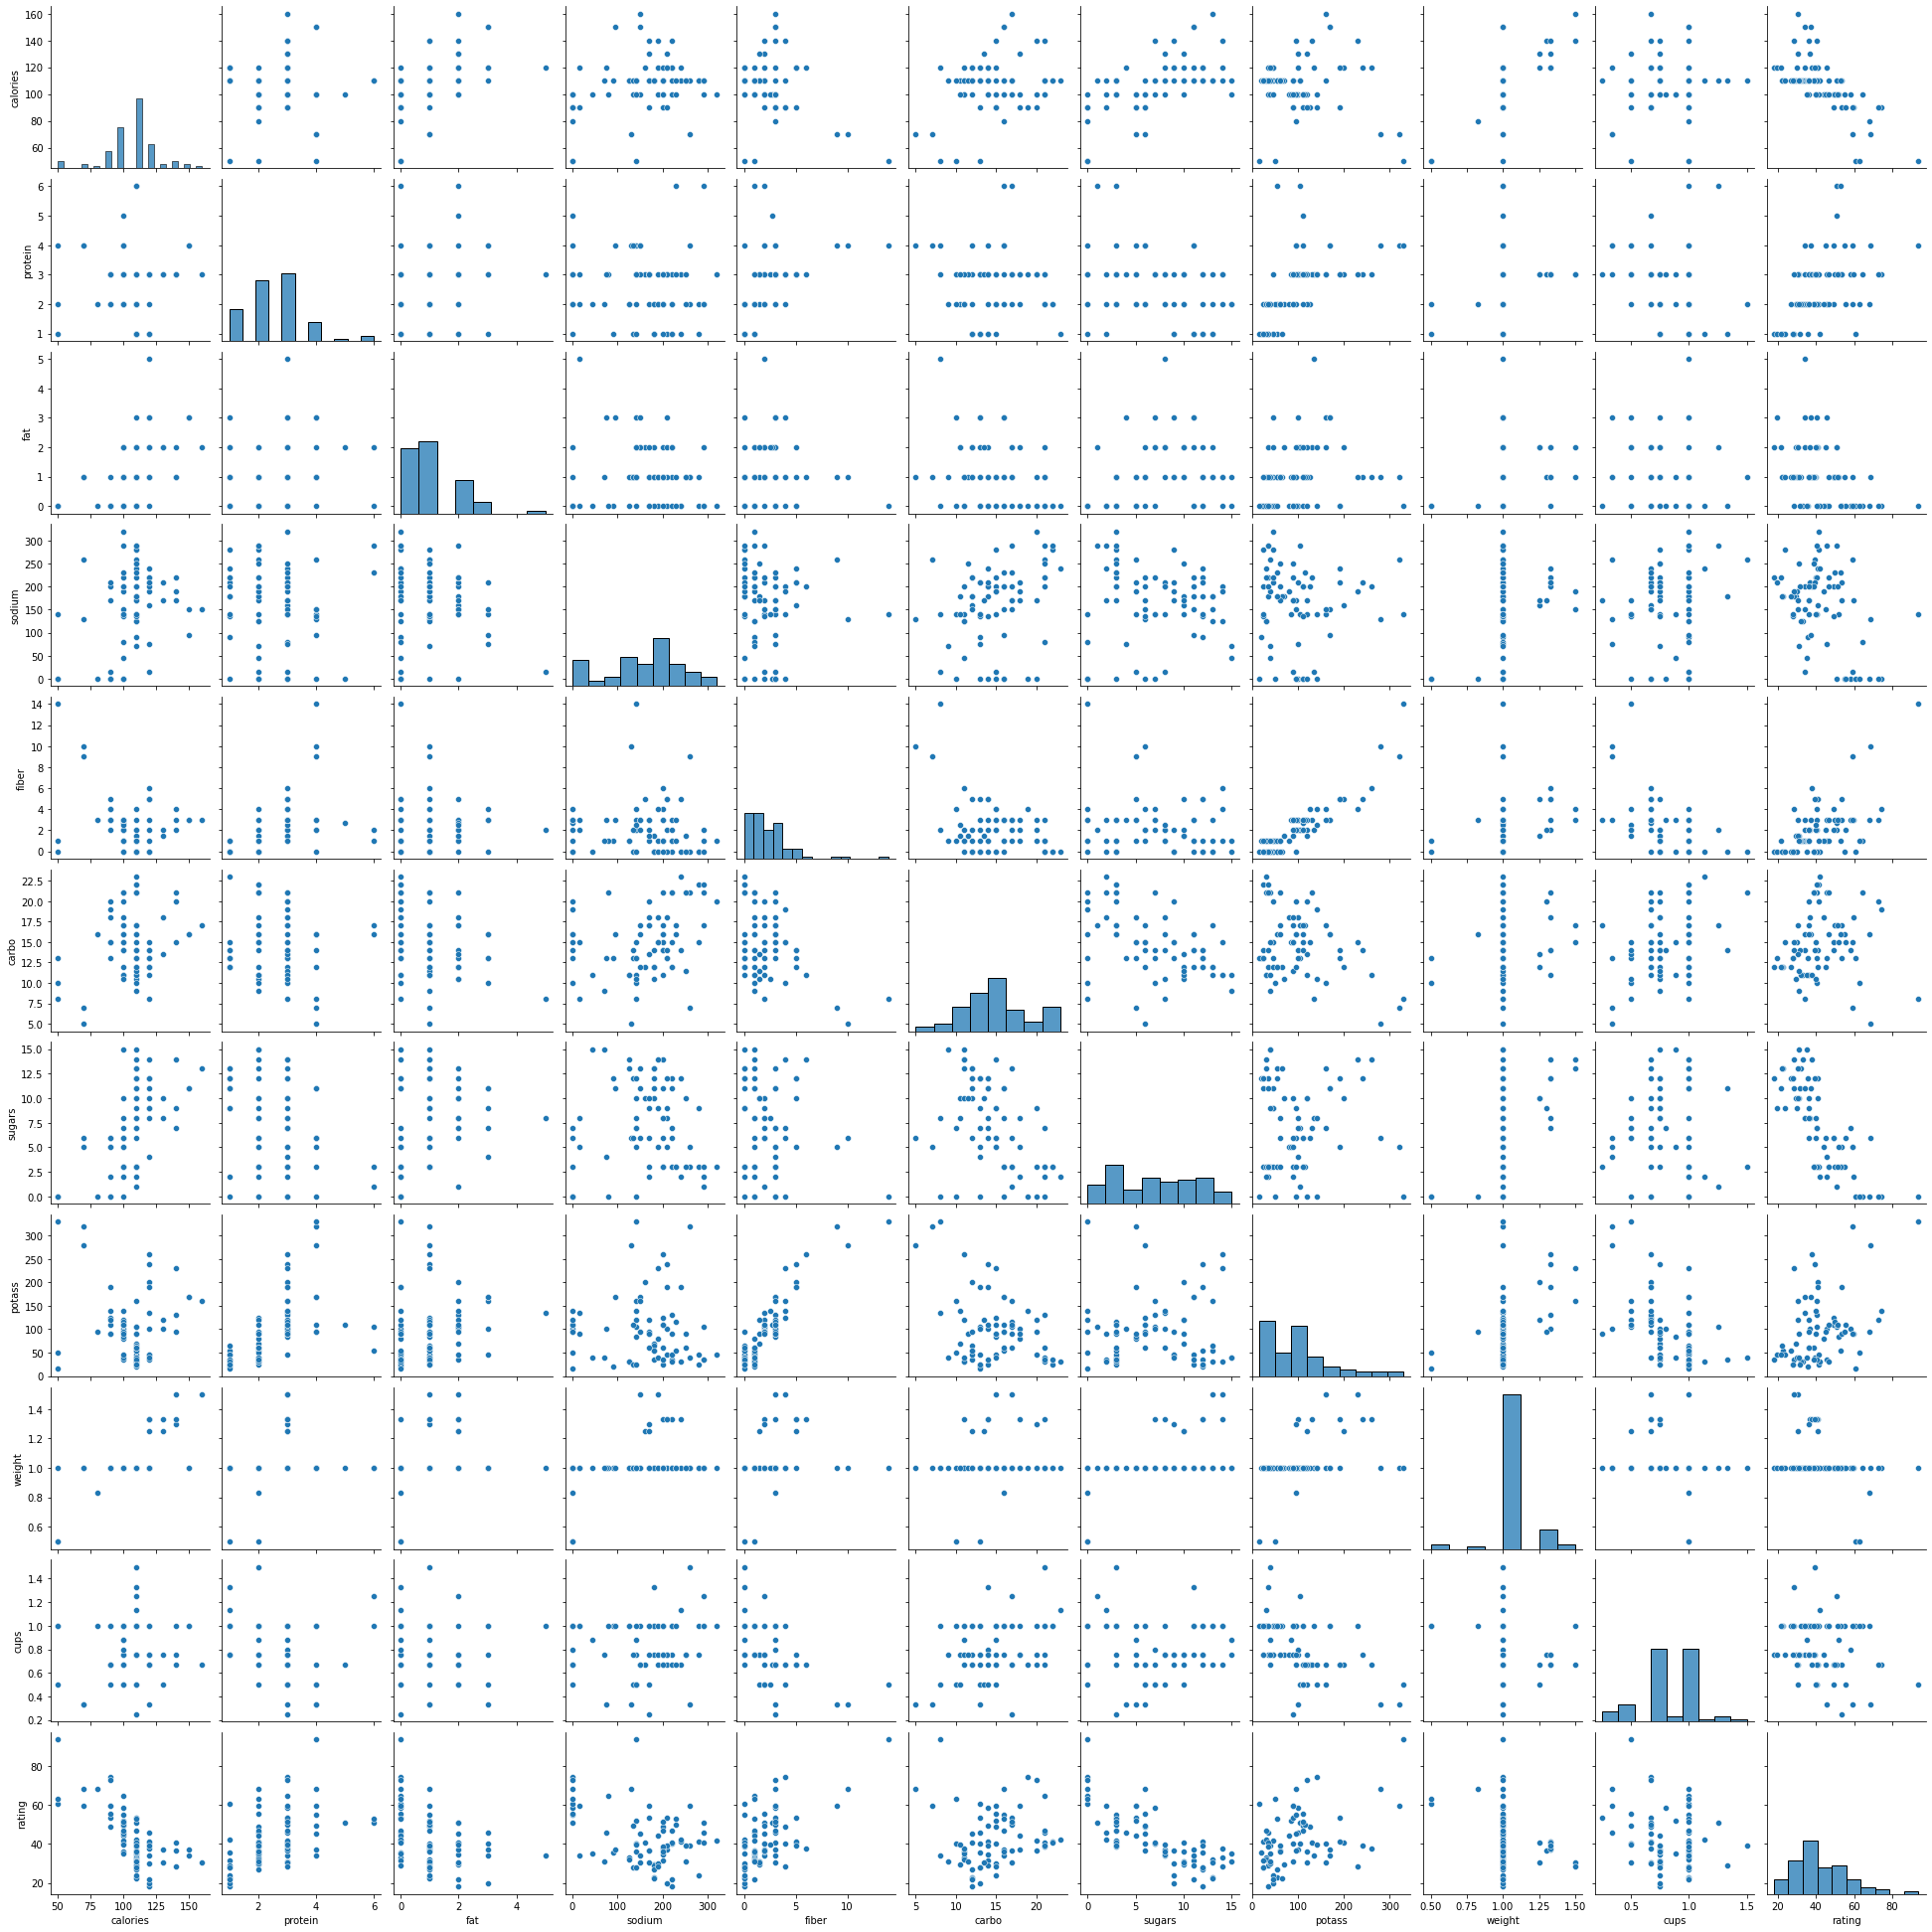

In [80]:
sns.pairplot(c1, diag_kind = 'hist')
plt.show()

i. fotass와 fiber  
ii. 매우 강한 상관이 있는 변수 쌍은 정보의 많은 부분이 겹치게 된다. 따라서, fiber나 potass 데이터를 삭제함으로써 변수의 개수를 축소시킨다.  
iii. 상관관계는 변하지 않는다. scale(단위)이 변했을 뿐이다. (❓❗️🌟❓❗️🌟 다시한번 확인해보기) 

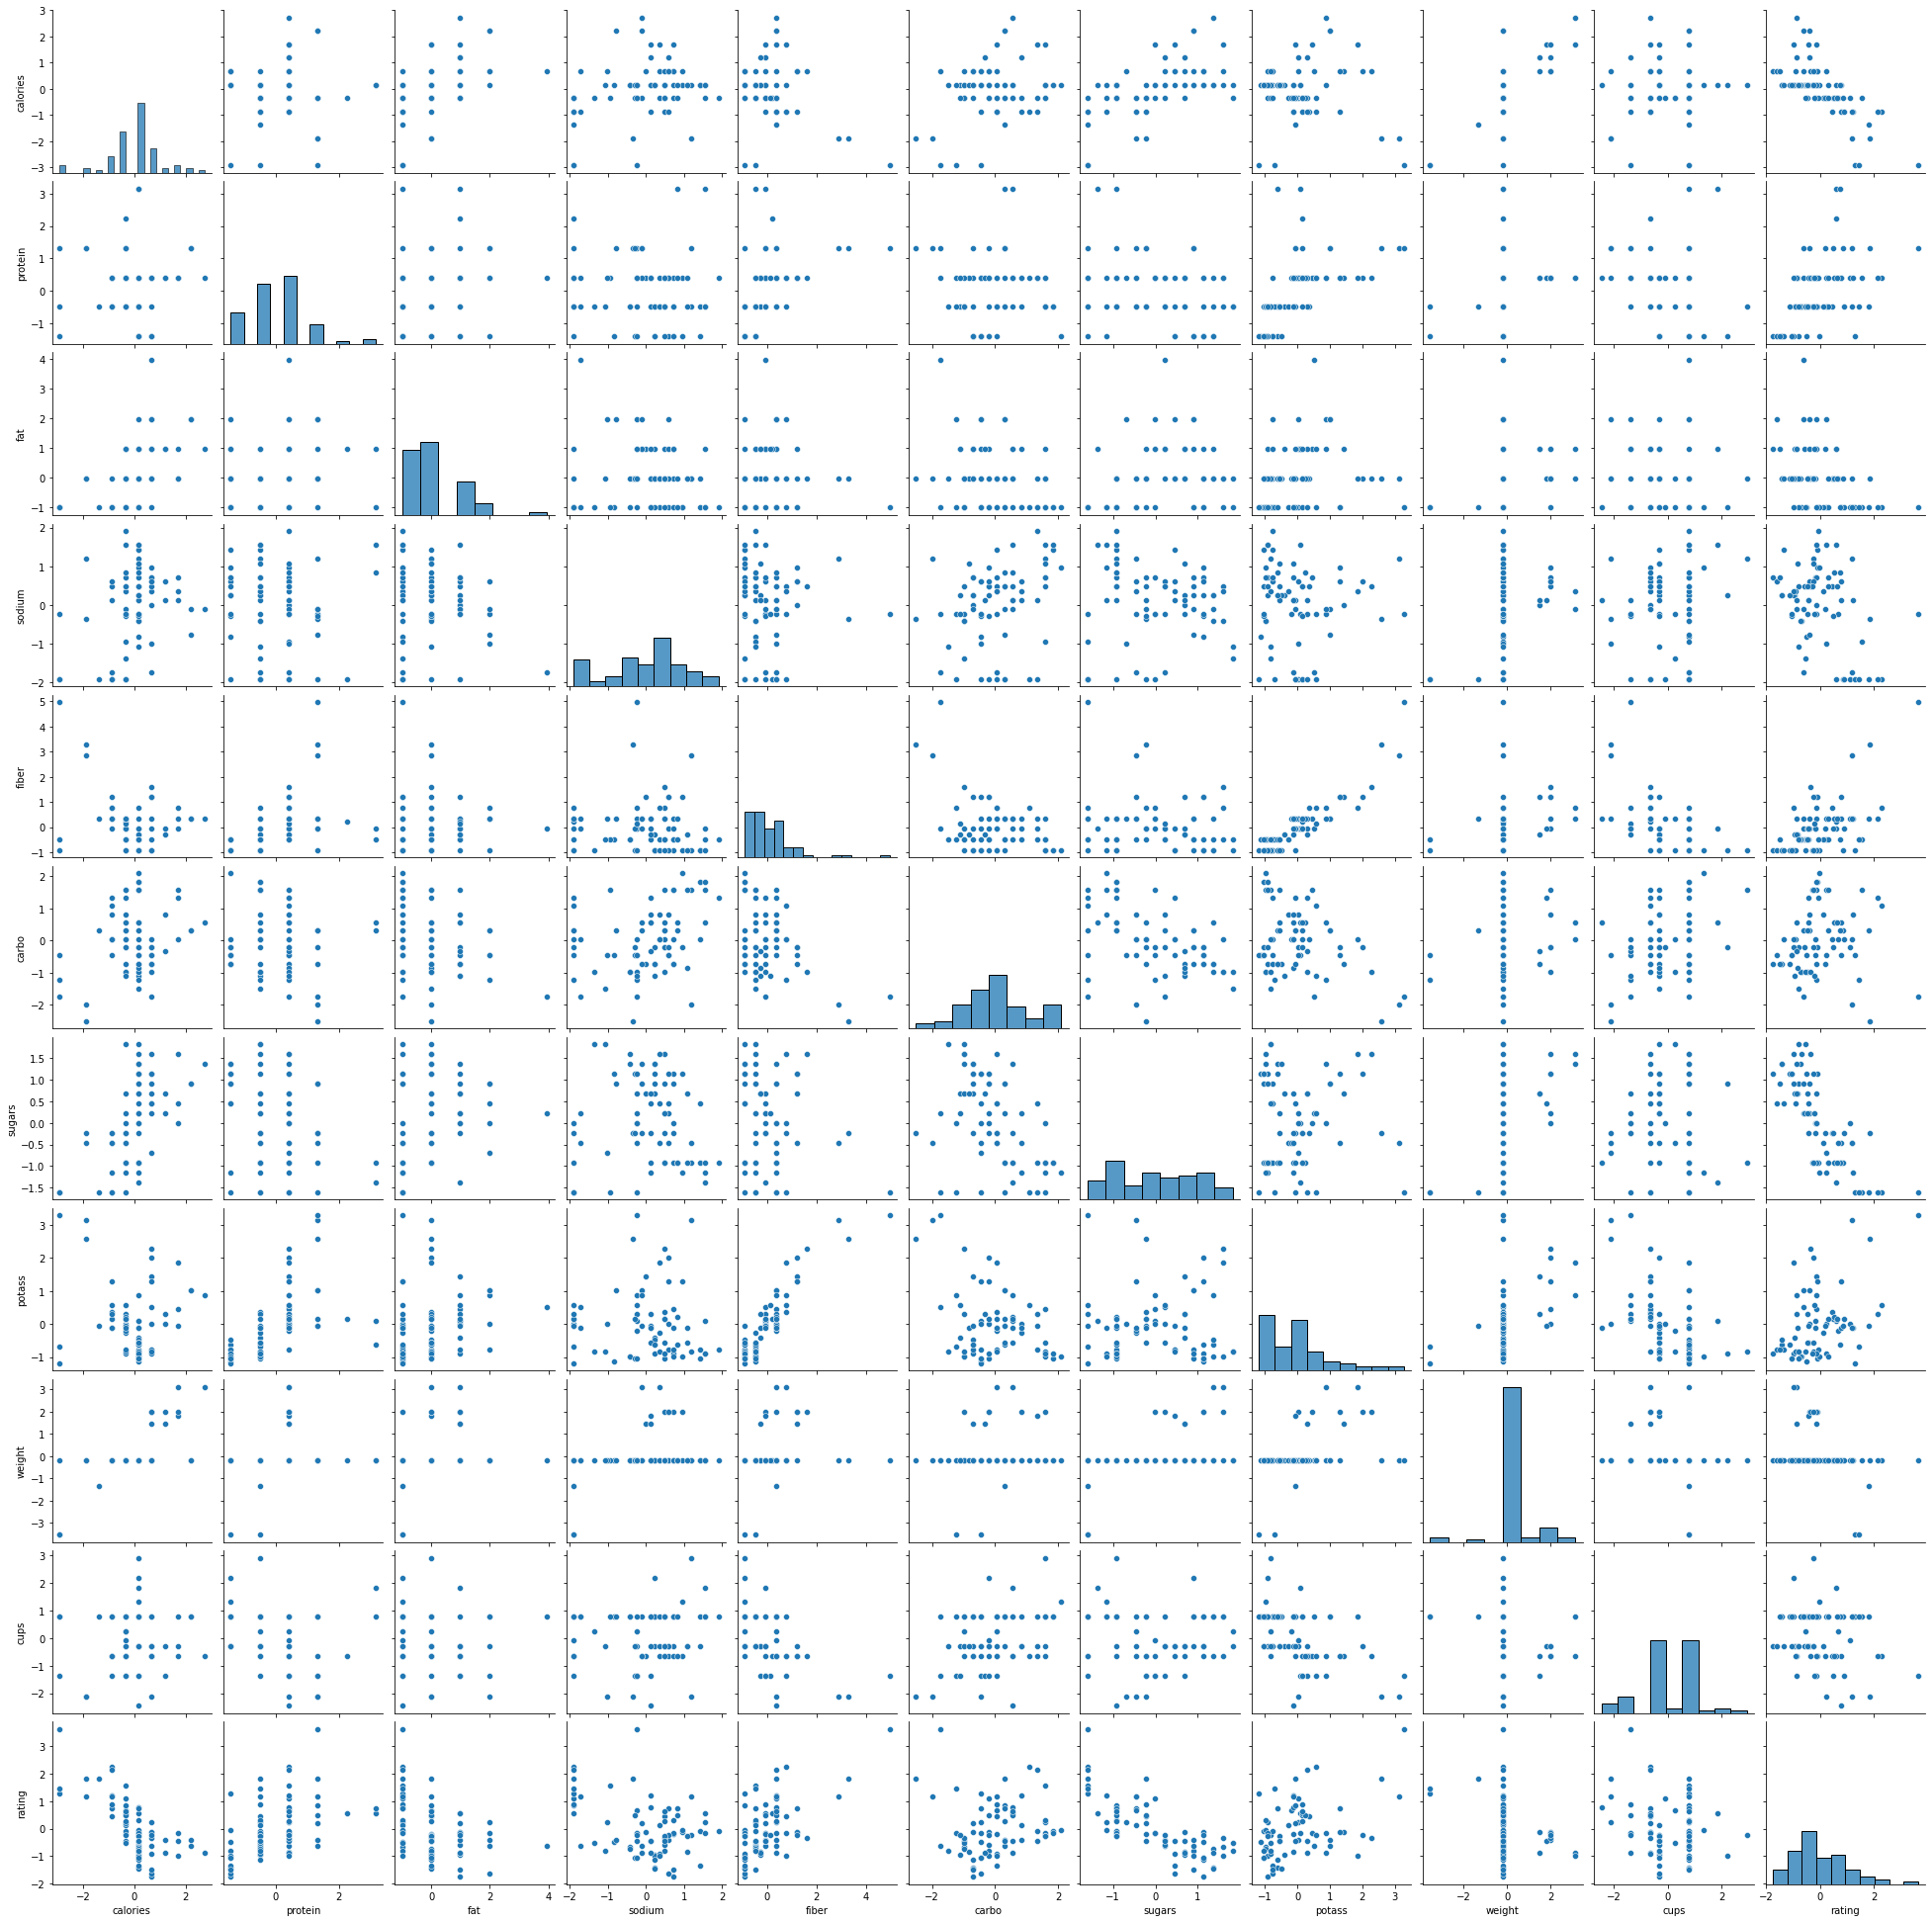

In [56]:
# f-iii 번 확인 (🌟'정규화'가 정확히 뭔지 나중에 다시 찾아보기/정리 하기🌟) 
sns.pairplot(c1_std, diag_kind = 'hist')
plt.show()

### g

첫번째 주성분인 PC1은 총변동의 약 54%을 차지한다. 

## 4.2 
### a
모든 범주형 데이터 삭제, 연속형 중 결측치 있는 넘들 삭제

In [68]:
univ_df = pd.read_csv("Universities.csv")
univ_df = univ_df.drop(columns = ['College Name','State','Public (1)/ Private (2)'])
univ_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   # appli. rec'd            1292 non-null   float64
 1   # appl. accepted          1291 non-null   float64
 2   # new stud. enrolled      1297 non-null   float64
 3   % new stud. from top 10%  1067 non-null   float64
 4   % new stud. from top 25%  1100 non-null   float64
 5   # FT undergrad            1299 non-null   float64
 6   # PT undergrad            1270 non-null   float64
 7   in-state tuition          1272 non-null   float64
 8   out-of-state tuition      1282 non-null   float64
 9   room                      981 non-null    float64
 10  board                     804 non-null    float64
 11  add. fees                 1028 non-null   float64
 12  estim. book costs         1254 non-null   float64
 13  estim. personal $         1121 non-null   float64
 14  % fac. w

In [87]:
univ_df = univ_df.dropna(axis = 0)
univ_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 471 entries, 0 to 1301
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   # appli. rec'd            471 non-null    float64
 1   # appl. accepted          471 non-null    float64
 2   # new stud. enrolled      471 non-null    float64
 3   % new stud. from top 10%  471 non-null    float64
 4   % new stud. from top 25%  471 non-null    float64
 5   # FT undergrad            471 non-null    float64
 6   # PT undergrad            471 non-null    float64
 7   in-state tuition          471 non-null    float64
 8   out-of-state tuition      471 non-null    float64
 9   room                      471 non-null    float64
 10  board                     471 non-null    float64
 11  add. fees                 471 non-null    float64
 12  estim. book costs         471 non-null    float64
 13  estim. personal $         471 non-null    float64
 14  % fac. w/

In [88]:
univ_df.head()

# appli. rec'd  # appl. accepted  # new stud. enrolled  \
0            193.0             146.0                  55.0   
2            146.0             117.0                  89.0   
9            805.0             588.0                 287.0   
11           608.0             520.0                 127.0   
21          4414.0            1500.0                 335.0   

    % new stud. from top 10%  % new stud. from top 25%  # FT undergrad  \
0                       16.0                      44.0           249.0   
2                        4.0                      24.0           492.0   
9                       67.0                      88.0          1376.0   
11                      26.0                      47.0           538.0   
21                      30.0                      60.0           908.0   

    # PT undergrad  in-state tuition  out-of-state tuition    room   board  \
0            869.0            7560.0                7560.0  1620.0  2500.0   
2           1849.0            1742.0                5226.0  2514.0  2250.0   
9            207.0           11660.0               11660.0  2050.0  2430.0   
11           126.0            8080.0                8080.0  1380.0  2540.0   
21           119.0            5666.0                5666.0  1424.0  1540.0   

    add. fees  estim. book costs  estim. personal $  % fac. w/PHD  \
0       130.0              800.0             1500.0          76.0   
2        34.0              500.0             1162.0          39.0   
9       120.0              400.0              900.0          74.0   
11      100.0              500.0             1100.0          63.0   
21      418.0             1000.0             1400.0          56.0   

    stud./fac. ratio  Graduation rate  
0               11.9             15.0  
2                9.5             39.0  
9               14.0             72.0  
11              11.4             44.0  
21              15.5             46.0

### b
주성분 분석하고 설명, 정규화 해야하는가? 핵심으로 여겨지는 성분의 특성을 설명하시오

In [76]:
pcs = PCA()
pcs.fit(univ_df)
pcsSummary_df = pd.DataFrame({'Standard Deviation' : np.sqrt(pcs.explained_variance_),
                              'Proportion of variance' : pcs.explained_variance_ratio_,
                              'Cumulative proportion' : np.cumsum(pcs.explained_variance_ratio_)
                             })
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df

PC1          PC2          PC3          PC4  \
Standard Deviation      7430.913993  5987.988977  1854.641218  1192.529271   
Proportion of variance     0.561370     0.364524     0.034969     0.014458   
Cumulative proportion      0.561370     0.925894     0.960863     0.975321   

                               PC5         PC6         PC7         PC8  \
Standard Deviation      967.427904  679.652692  596.976117  580.629902   
Proportion of variance    0.009515    0.004696    0.003623    0.003427   
Cumulative proportion     0.984836    0.989532    0.993155    0.996582   

                               PC9        PC10        PC11        PC12  \
Standard Deviation      417.613636  318.127186  188.867611  155.606172   
Proportion of variance    0.001773    0.001029    0.000363    0.000246   
Cumulative proportion     0.998355    0.999384    0.999747    0.999993   

                             PC13       PC14       PC15          PC16  \
Standard Deviation      19.049140  12.528743  11.018447  5.330031e+00   
Proportion of variance   0.000004   0.000002   0.000001  2.888179e-07   
Cumulative proportion    0.999997   0.999998   1.000000  9.999999e-01   

                                PC17  
Standard Deviation      2.905918e+00  
Proportion of variance  8.584820e-08  
Cumulative proportion   1.000000e+00

In [86]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), columns = pcsSummary_df.columns,
                               index = univ_df.columns)
pcsComponents_df.iloc[:,:5]

PC1       PC2       PC3       PC4       PC5
# appli. rec'd            0.271883  0.551183  0.664458  0.129476 -0.034246
# appl. accepted          0.194107  0.321299  0.190957 -0.008357 -0.076674
# new stud. enrolled      0.084730  0.101590 -0.087451 -0.055253 -0.036068
% new stud. from top 10% -0.000898  0.001732  0.000136 -0.001906  0.001236
% new stud. from top 25% -0.000811  0.001925  0.000040 -0.002352  0.001009
# FT undergrad            0.458121  0.492263 -0.635303 -0.284582 -0.080402
# PT undergrad            0.108253  0.073410 -0.285353  0.942562 -0.051743
in-state tuition         -0.670187  0.382489 -0.082787 -0.016972 -0.621759
out-of-state tuition     -0.454535  0.428685 -0.129410  0.018657  0.748634
room                     -0.033420  0.055584  0.040113  0.065120  0.115354
board                    -0.034236  0.040897 -0.008232  0.067313  0.006301
add. fees                 0.013209  0.008746  0.032868 -0.012755  0.103097
estim. book costs        -0.000058  0.003291  0.000316  0.010795 -0.005223
estim. personal $         0.037557  0.001185 -0.054659  0.031666 -0.106952
% fac. w/PHD             -0.000205  0.001564 -0.000995 -0.000055  0.004822
stud./fac. ratio          0.000295 -0.000159  0.000025 -0.000135 -0.000201
Graduation rate          -0.001072  0.001397  0.000920 -0.002172  0.001129

첫번째부터 세번째까지의 주성분이 전체 변동의 96%를 차지한다.  
또한 첫번째 주성분이 'in-state tuition'이, 두번째 주성분은 '# appli. rec'd'이 각 성분에 대하여 가장 큰 변동을 차지한다.  
또한 '# FT undergrad'는 두 성분 모두에게서 (제법) 큰 지배성을 갖는다.  
**이는 해당 성분의 분산이 너무 커서 총분산을 독차지한 것으로 보이므로, 정규화를 해야된다고 생각한다.** << 질문 

## 4.3 
### a
범주형 변수를 확인하시오

In [100]:
toyota_df = pd.read_csv("ToyotaCorolla.csv")
toyota_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Id                 1436 non-null   int64 
 1   Model              1436 non-null   object
 2   Price              1436 non-null   int64 
 3   Age_08_04          1436 non-null   int64 
 4   Mfg_Month          1436 non-null   int64 
 5   Mfg_Year           1436 non-null   int64 
 6   KM                 1436 non-null   int64 
 7   Fuel_Type          1436 non-null   object
 8   HP                 1436 non-null   int64 
 9   Met_Color          1436 non-null   int64 
 10  Color              1436 non-null   object
 11  Automatic          1436 non-null   int64 
 12  CC                 1436 non-null   int64 
 13  Doors              1436 non-null   int64 
 14  Cylinders          1436 non-null   int64 
 15  Gears              1436 non-null   int64 
 16  Quarterly_Tax      1436 non-null   int64 


범주형 변수 : Model, Fuel_Type, Color

### b
범주형 변수와 그로부터 파생된 이진형 가변수의 관계를 설명하시오

In [95]:
pd.set_option('display.max_columns', 100)
toyota_df.head(3)

Id                                          Model  Price  Age_08_04  \
0   1  TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
1   2  TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   
2   3  TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24   

   Mfg_Month  Mfg_Year     KM Fuel_Type  HP  Met_Color   Color  Automatic  \
0         10      2002  46986    Diesel  90          1    Blue          0   
1         10      2002  72937    Diesel  90          1  Silver          0   
2          9      2002  41711    Diesel  90          1    Blue          0   

     CC  Doors  Cylinders  Gears  Quarterly_Tax  Weight  Mfr_Guarantee  \
0  2000      3          4      5            210    1165              0   
1  2000      3          4      5            210    1165              0   
2  2000      3          4      5            210    1165              1   

   BOVAG_Guarantee  Guarantee_Period  ABS  Airbag_1  Airbag_2  Airco  \
0                1                 3    1         1         1      0   
1                1                 3    1         1         1      1   
2                1                 3    1         1         1      0   

   Automatic_airco  Boardcomputer  CD_Player  Central_Lock  Powered_Windows  \
0                0              1          0             1                1   
1                0              1          1             1                0   
2                0              1          0             0                0   

   Power_Steering  Radio  Mistlamps  Sport_Model  Backseat_Divider  \
0               1      0          0            0                 1   
1               1      0          0            0                 1   
2               1      0          0            0                 1   

   Metallic_Rim  Radio_cassette  Parking_Assistant  Tow_Bar  
0             0               0                  0        0  
1             0               0                  0        0  
2             0               0                  0        0

In [96]:
toyota_df.ABS

0       1
1       1
2       1
3       1
4       1
       ..
1431    1
1432    1
1433    0
1434    0
1435    0
Name: ABS, Length: 1436, dtype: int64

Mfr_Guarantee과 BOYAG_Guarantee, Airbag_1과 Airbag_2, Airco과 Automatic_airco 등등의 범주형 변수에서 파생된 이진형 가변수들이 있다.  
범주형 변수의 각 범주마다 가변수가 하나씩 생성된다. 이 가변수는 해당 범주에 해당되는 행은 1, 해당되지 않는 행은 0으로 구성된 이진형 변수이다.  
가변수는 범주형자료를 수치형자료로 바꾸어주는 역할을 하면서 머신러닝 등을 할 때 기계가 이해할 수 있도록 해준다.  

### c
n개의 가변수가 필요하다. 하지만 본래 범주형 변수를 0번째 가변수로 바꿔주면, (n-1)개의 가변수만 생성할 수 있다. 

### d
범주형 변수들을 이진형 가변수로 바꾸고, 각 레코드에 대해 가변수들의 값을 글로 설명하라

In [101]:
toyota_dum = pd.get_dummies(toyota_df, columns = ['Fuel_Type', 'Color'])
toyota_dum.head(2)

Id                                          Model  Price  Age_08_04  \
0   1  TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
1   2  TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   

   Mfg_Month  Mfg_Year     KM  HP  Met_Color  Automatic    CC  Doors  \
0         10      2002  46986  90          1          0  2000      3   
1         10      2002  72937  90          1          0  2000      3   

   Cylinders  Gears  Quarterly_Tax  Weight  Mfr_Guarantee  BOVAG_Guarantee  \
0          4      5            210    1165              0                1   
1          4      5            210    1165              0                1   

   Guarantee_Period  ABS  Airbag_1  Airbag_2  Airco  Automatic_airco  \
0                 3    1         1         1      0                0   
1                 3    1         1         1      1                0   

   Boardcomputer  CD_Player  Central_Lock  Powered_Windows  Power_Steering  \
0              1          0             1                1               1   
1              1          1             1                0               1   

   Radio  Mistlamps  Sport_Model  Backseat_Divider  Metallic_Rim  \
0      0          0            0                 1             0   
1      0          0            0                 1             0   

   Radio_cassette  Parking_Assistant  Tow_Bar  Fuel_Type_CNG  \
0               0                  0        0              0   
1               0                  0        0              0   

   Fuel_Type_Diesel  Fuel_Type_Petrol  Color_Beige  Color_Black  Color_Blue  \
0                 1                 0            0            0           1   
1                 1                 0            0            0           0   

   Color_Green  Color_Grey  Color_Red  Color_Silver  Color_Violet  \
0            0           0          0             0             0   
1            0           0          0             1             0   

   Color_White  Color_Yellow  
0            0             0  
1            0             0

In [116]:
for a in toyota_dum.loc[:,'Fuel_Type_CNG':'Fuel_Type_Petrol'].columns:
    print('{}의 개수 : {}'.format(a, toyota_dum[a][toyota_dum[a] == 1].sum()))

Fuel_Type_CNG의 개수 : 17
Fuel_Type_Diesel의 개수 : 155
Fuel_Type_Petrol의 개수 : 1264


In [118]:
for a in toyota_dum.loc[:,'Color_Beige':].columns:
    print('{}의 개수 : {}'.format(a, toyota_dum[a][toyota_dum[a] == 1].sum()))

Color_Beige의 개수 : 3
Color_Black의 개수 : 191
Color_Blue의 개수 : 283
Color_Green의 개수 : 220
Color_Grey의 개수 : 301
Color_Red의 개수 : 278
Color_Silver의 개수 : 122
Color_Violet의 개수 : 4
Color_White의 개수 : 31
Color_Yellow의 개수 : 3


Fuel_Type은 CNG, Diesel, Petrol 의 세 개의 범주가 있다. 각각 0과 1로 이루어진 가변수가 생성됐다.   
이 중 Petrol 가변수는 값이 1인 행의 개수가 1264개로, Fuel_Type의 대부분을 차지한다.  
Color는 Beige, Black, Blue, Green, Grey, Red, Silver의 7개의 범주가 있다.   

### e
상관행렬, 산점도행렬 작성 / 변수들 관계 설명

In [120]:
toyota_dum.corr()

Id     Price  Age_08_04  Mfg_Month  Mfg_Year  \
Id                 1.000000 -0.738250   0.906132   0.043742 -0.919523   
Price             -0.738250  1.000000  -0.876590  -0.018138  0.885159   
Age_08_04          0.906132 -0.876590   1.000000  -0.123255 -0.983661   
Mfg_Month          0.043742 -0.018138  -0.123255   1.000000 -0.057416   
Mfg_Year          -0.919523  0.885159  -0.983661  -0.057416  1.000000   
KM                 0.273298 -0.569960   0.505672  -0.020630 -0.504974   
HP                -0.109375  0.314990  -0.156622  -0.039312  0.164697   
Met_Color         -0.079713  0.108905  -0.108150   0.030266  0.103310   
Automatic          0.066265  0.033081   0.031717   0.009146 -0.033567   
CC                -0.117704  0.126389  -0.098084   0.037387  0.091892   
Doors             -0.130207  0.185326  -0.148359  -0.012069  0.151442   
Cylinders               NaN       NaN        NaN        NaN       NaN   
Gears             -0.043343  0.063104  -0.005364  -0.013063  0.007766   
Quarterly_Tax     -0.240821  0.219197  -0.198431   0.031373  0.193934   
Weight            -0.414500  0.581198  -0.470253  -0.002167  0.473478   
Mfr_Guarantee     -0.162006  0.197802  -0.164658  -0.005771  0.166697   
BOVAG_Guarantee   -0.015065  0.028133   0.006865  -0.003863 -0.006206   
Guarantee_Period  -0.086256  0.146627  -0.152563   0.029010  0.148218   
ABS               -0.461437  0.306138  -0.412887   0.072532  0.402215   
Airbag_1          -0.123465  0.093588  -0.105406   0.003756  0.105359   
Airbag_2          -0.358316  0.248974  -0.329017   0.076749  0.317075   
Airco             -0.386207  0.429259  -0.403600   0.057088  0.395674   
Automatic_airco   -0.327468  0.588262  -0.426259  -0.049017  0.437718   
Boardcomputer     -0.695207  0.601292  -0.719449   0.017715  0.720567   
CD_Player         -0.464520  0.481374  -0.510895  -0.016736  0.517008   
Central_Lock      -0.238940  0.343458  -0.279631   0.010055  0.279490   
Powered_Windows   -0.236723  0.356518  -0.283856   0.025185  0.280996   
Power_Steering    -0.091587  0.064275  -0.069192  -0.055495  0.079676   
Radio             -0.010971 -0.041887   0.013791   0.031601 -0.019607   
Mistlamps         -0.139708  0.222083  -0.126895  -0.033504  0.133737   
Sport_Model       -0.028704  0.164121  -0.110988   0.052789  0.102080   
Backseat_Divider  -0.136398  0.102569  -0.116751   0.023245  0.113237   
Metallic_Rim      -0.022232  0.108564  -0.040045   0.023506  0.036022   
Radio_cassette    -0.011611 -0.043179   0.012857   0.032576 -0.018844   
Parking_Assistant -0.049103  0.044375  -0.048172   0.007113  0.047171   
Tow_Bar            0.159171 -0.172369   0.188720  -0.042170 -0.182206   
Fuel_Type_CNG     -0.038452 -0.039536   0.002389   0.001289 -0.002637   
Fuel_Type_Diesel  -0.157960  0.054084  -0.097740   0.051501  0.088986   
Fuel_Type_Petrol   0.163764 -0.038516   0.092611  -0.049646 -0.084162   
Color_Beige        0.033422 -0.022684   0.023098   0.028902 -0.028480   
Color_Black       -0.023022  0.034896  -0.019399   0.008067  0.018052   
Color_Blue        -0.000585  0.014431  -0.032955   0.057279  0.022763   
Color_Green        0.081231 -0.104963   0.103530  -0.030403 -0.098638   
Color_Grey        -0.102522  0.169947  -0.137660  -0.031214  0.144152   
Color_Red          0.065942 -0.103803   0.098365   0.008646 -0.100526   
Color_Silver      -0.037468  0.028562  -0.028550  -0.017838  0.031958   
Color_Violet       0.000755 -0.016848   0.017916  -0.028353 -0.012880   
Color_White        0.037080 -0.103360   0.050933  -0.001445 -0.050977   
Color_Yellow      -0.044680  0.022726  -0.040883   0.001609  0.040837   

                         KM        HP  Met_Color  Automatic        CC  \
Id                 0.273298 -0.109375  -0.079713   0.066265 -0.117704   
Price             -0.569960  0.314990   0.108905   0.033081  0.126389   
Age_08_04          0.505672 -0.156622  -0.108150   0.031717 -0.098084   
Mfg_Month         -0.020630 -0.039312   0.030266   0.009146  0.037387   
Mfg_Year 

<AxesSubplot:>

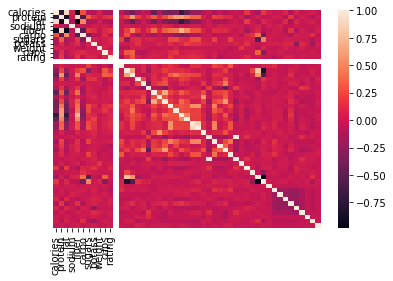

In [124]:
toyota_corr = toyota_dum.corr()
sns.heatmap(toyota_corr, xticklabels = corr.columns, yticklabels = corr.columns)

In [121]:
sns.pairplot(toyota_dum, diag_kind = 'hist')
plt.show()

Price와 Age_08_04, Mfg_Year과 Age_08_04, Price와 Mfg_Year등이 높은 상관성을 보인다

## 4.4
### a
왜 PC1이 엄청큰지?

In [128]:
wine_df = pd.read_csv('Wine.csv')
wine_df.head()

Type  Alcohol  Malic_Acid   Ash  Ash_Alcalinity  Magnesium  Total_Phenols  \
0    A    14.23        1.71  2.43            15.6        127           2.80   
1    A    13.20        1.78  2.14            11.2        100           2.65   
2    A    13.16        2.36  2.67            18.6        101           2.80   
3    A    14.37        1.95  2.50            16.8        113           3.85   
4    A    13.24        2.59  2.87            21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280_OD315  Proline  
0         3.92     1065  
1         3.40     1050  
2         3.17     1185  
3         3.45     1480  
4         2.93      735

PC1의 Proline에 대한 가중치가 -0.9998로, 매우 큰 음의 가중치를 갖고 있다.  
이 이유는 다른 변수들은 대부분 20 이하의 값을 가지지만,   
Proline의 단위는 천~백단위로 Proline의 분산이 매우 크기때문에 변동성의 대부분을 차지하게 된다.  
이로 인하여 PC1이 압도적인 변동성을 갖게 된다.

### b

정규화하는 것이 옳다고 본다. 그 이유는 a번에서 언급했듯이 Proline의 분산 스케일이 다른 변수들에 비해 너무 커서 변동성의 대부분을 차지하게 되기 때문이다. 

정규화를 통하여 동일한 분산 스케일을 갖게 한 후에 각 변수들에게 변동에 관하여 동등한 관계성을 부여해야 한다. 
